In [39]:
#%pip install axelrod
#!conda list freetype

In [40]:
import axelrod as axl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

### Setup parameters

In [41]:
# Strategies from original axelrod tournament
players = [axl.TitForTat(), axl.FirstByTidemanAndChieruzzi(), axl.FirstByNydegger(), axl.FirstByGrofman(), axl.FirstByShubik(),
           axl.FirstBySteinAndRapoport(), axl.Grudger(), axl.FirstByDavis(), axl.FirstByGraaskamp(), axl.FirstByDowning(),
           axl.FirstByFeld(), axl.FirstByJoss(), axl.FirstByTullock(), axl.FirstByAnonymous(), axl.Random()]    


num_players = len(players)
num_reps = 5
num_turns = 200

### Running the tournament

In [42]:
tournament = axl.Tournament(players=players, repetitions=num_reps, turns=num_turns)
results = tournament.play(build_results = True, filename="results.csv")

Analysing: 100%|██████████| 25/25 [00:00<00:00, 163.23it/s]


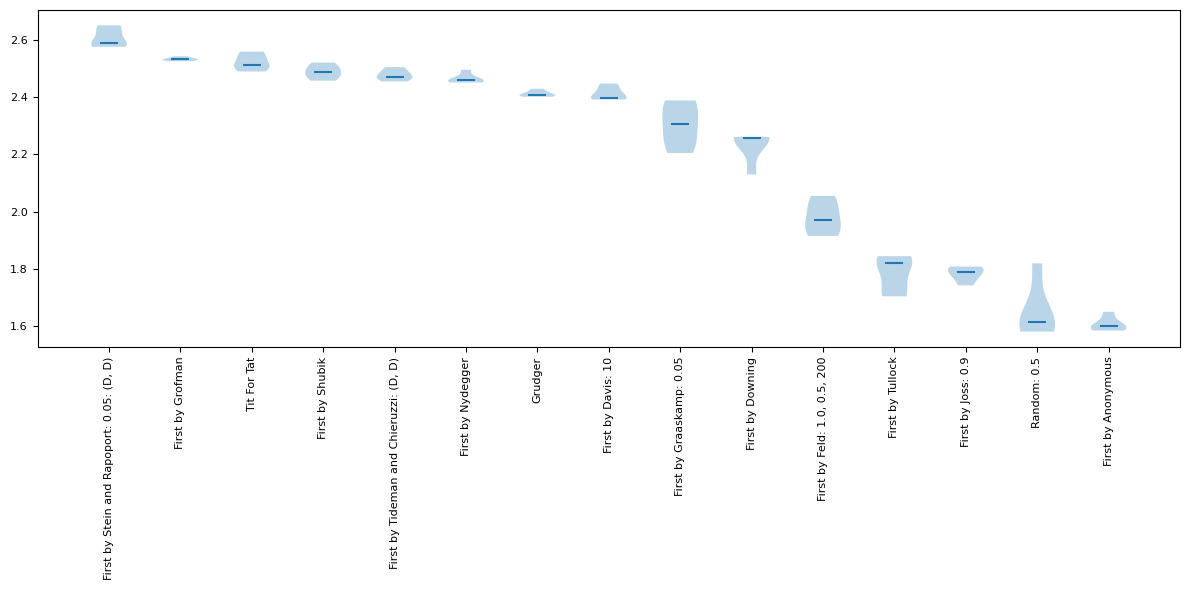

In [43]:
%matplotlib inline
plot = axl.Plot(results)
p = plot.boxplot()

In [44]:
results.write_summary("summary.csv")

In [45]:
results.scores

[[7164, 7032, 7023, 6970, 7123],
 [7012, 6918, 6873, 6967, 6912],
 [6862, 6890, 6886, 6986, 6877],
 [7118, 7087, 7096, 7083, 7070],
 [6880, 7005, 6966, 6921, 7057],
 [7230, 7211, 7421, 7382, 7251],
 [6723, 6735, 6801, 6737, 6761],
 [6795, 6714, 6696, 6713, 6852],
 [6633, 6298, 6173, 6687, 6452],
 [6309, 6319, 6330, 5964, 6315],
 [5753, 5419, 5362, 5657, 5520],
 [5052, 5063, 5009, 4963, 4879],
 [5164, 4809, 4772, 5099, 5109],
 [4502, 4453, 4437, 4620, 4478],
 [4520, 4468, 4577, 5094, 4427]]

In [46]:
results.normalised_scores

[[2.5585714285714287,
  2.511428571428571,
  2.5082142857142857,
  2.4892857142857143,
  2.5439285714285718],
 [2.5042857142857144,
  2.470714285714286,
  2.4546428571428573,
  2.4882142857142857,
  2.468571428571429],
 [2.450714285714286,
  2.460714285714286,
  2.459285714285714,
  2.495,
  2.4560714285714282],
 [2.5421428571428573,
  2.531071428571429,
  2.5342857142857143,
  2.529642857142857,
  2.525],
 [2.457142857142857,
  2.501785714285714,
  2.4878571428571425,
  2.4717857142857143,
  2.5203571428571427],
 [2.582142857142857,
  2.575357142857143,
  2.6503571428571426,
  2.636428571428571,
  2.589642857142857],
 [2.4010714285714285,
  2.4053571428571425,
  2.4289285714285715,
  2.406071428571429,
  2.4146428571428573],
 [2.4267857142857143,
  2.3978571428571427,
  2.391428571428572,
  2.3975,
  2.447142857142857],
 [2.3689285714285715,
  2.249285714285714,
  2.204642857142857,
  2.388214285714286,
  2.3042857142857143],
 [2.253214285714286,
  2.2567857142857144,
  2.260714285714

In [47]:
results.payoffs[2] # this is a way to implement schulze method by match

[[3.0, 3.0, 3.0, 3.0, 3.0],
 [2.97, 2.97, 2.97, 2.97, 2.97],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [2.97, 2.97, 2.97, 2.97, 2.97],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [2.805, 2.745, 2.76, 2.805, 2.76],
 [0.075, 0.075, 0.075, 0.075, 0.075],
 [2.25, 2.355, 2.22, 2.385, 2.34],
 [2.7, 2.7, 2.685, 2.73, 2.76],
 [2.61, 2.7, 2.79, 2.715, 2.745],
 [1.575, 1.44, 1.47, 1.66, 1.36],
 [1.355, 1.495, 1.49, 1.62, 1.405]]

### Schulze method

#### Build pairwise wins matrix

In [48]:
pairwise_wins = np.zeros((num_players, num_players), dtype=float)

for strat_1 in range(num_players):
    for strat_2 in range(num_players):
        if strat_1 != strat_2:
            wins_1 = 0
            wins_2 = 0
            for rep in range(num_reps):
                score_1 = results.payoffs[strat_1][strat_2][rep]
                score_2 = results.payoffs[strat_2][strat_1][rep]
                if score_1 > score_2:
                    wins_1 += round((score_1-score_2) * num_turns)
            # Save score difference from strat_1 over strat_2 (if positive)
            pairwise_wins[strat_1][strat_2] = wins_1
        else:
            pairwise_wins[strat_1][strat_2] = np.nan    

print("Pairwise wins matrix:\n", pairwise_wins)

Pairwise wins matrix:
 [[  nan    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [  25.   nan   50.   35.   25.    0.   25.   25.  185.  150.    0.    0.
    35. 2110. 2060.]
 [   0.    0.   nan    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.   nan    0.    0.    0.    0.  525.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.    0.   nan    0.    0.    0. 1385.    0.    0.    0.
     0. 1470. 1600.]
 [  25.    0.   50.   30.   25.   nan   25.   25.   25. 1425.    0.    0.
     5. 2295. 2335.]
 [   0.    0.    0.    0.    0.    0.   nan    0.  665.   50.    0.    0.
    90. 2455. 2475.]
 [   0.    0.    0.    0.    0.    0.    0.   nan  670.    0.    0.    0.
    80. 2265. 2390.]
 [   0.    0.  375.    0.    0.    0.    0.    0.   nan  390.    0.    0.
     0. 1840. 1825.]
 [   0.    0. 4825. 2885.   75.    0.    0.  125.    0.   nan    0.    0.
   150. 2210. 1975.]
 [  25.    0. 1150.  790.  

#### Apply Schulze method

In [49]:
def schulze_method(pairwise_matrix):
    n = len(pairwise_matrix)

    # Compute strongest paths (Floyd–Warshall style)
    for i in range(n):
        for j in range(n):
            if i != j:
                for k in range(n):
                    if i != k and j != k:
                        pairwise_matrix[j][k] = max(pairwise_matrix[j][k], min(pairwise_matrix[j][i], pairwise_matrix[i][k]))

    # Ranking: sort by scores difference in path strength
    ranking = sorted(range(n), key=lambda x: sum(pairwise_matrix[x][y] > pairwise_matrix[y][x] for y in range(n)), reverse=True)
    return ranking

schulze_ranking = schulze_method(pairwise_wins)
print("\nSchulze ranking:")
for pos, idx in enumerate(schulze_ranking, 1):
    print(f"{pos}. {players[idx]}")


Schulze ranking:
1. First by Joss: 0.9
2. First by Tideman and Chieruzzi: (D, D)
3. First by Feld: 1.0, 0.5, 200
4. First by Stein and Rapoport: 0.05: (D, D)
5. Grudger
6. First by Davis: 10
7. First by Tullock
8. First by Shubik
9. First by Downing
10. First by Graaskamp: 0.05
11. First by Anonymous
12. Random: 0.5
13. First by Grofman
14. Tit For Tat
15. First by Nydegger


In [50]:
print(pairwise_wins)

[[  nan    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [  25.   nan 2110.  615.  150.   20.   25.  125.  525.  515.   10.    0.
   150. 2110. 2060.]
 [   0.    0.   nan    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [  25.    0.  525.   nan  150.   20.   20.  125.  525.  515.   10.    0.
   150.  525.  525.]
 [  25.    0. 1600.  615.   nan   20.   20.  125. 1385.  515.   10.    0.
   150. 1470. 1600.]
 [  25.    0. 2335. 1425.  150.   nan   25.  125.  525. 1425.   10.    0.
   150. 2295. 2335.]
 [  25.    0. 2475.  615.  150.   20.   nan  125.  665.  515.   10.    0.
   150. 2455. 2475.]
 [  25.    0. 2390.  615.  150.   20.   20.   nan  670.  515.   10.    0.
   150. 2265. 2390.]
 [  25.    0. 1840.  615.  150.   20.   20.  125.   nan  515.   10.    0.
   150. 1840. 1825.]
 [  25.    0. 4825. 2885.  150.   20.   20.  125.  525.   nan   10.    0.
   150. 2210. 1975.]
 [  25.    0. 1250. 1250.  150.   25.   25.  125. 

In [51]:
print(schulze_ranking)

[11, 1, 10, 5, 6, 7, 12, 4, 9, 8, 13, 14, 3, 0, 2]


#### Schulze graph

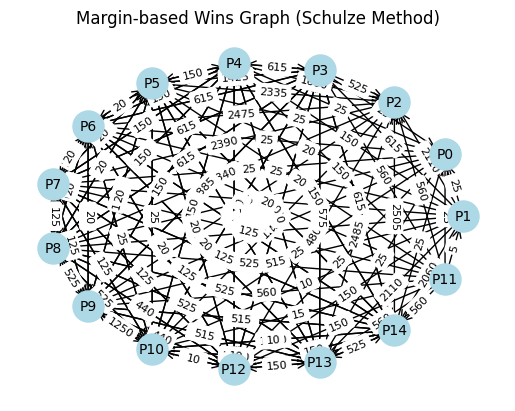


 Legend:
P0 - Tit For Tat
P1 - First by Tideman and Chieruzzi: (D, D)
P2 - First by Nydegger
P3 - First by Grofman
P4 - First by Shubik
P5 - First by Stein and Rapoport: 0.05: (D, D)
P6 - Grudger
P7 - First by Davis: 10
P8 - First by Graaskamp: 0.05
P9 - First by Downing
P10 - First by Feld: 1.0, 0.5, 200
P11 - First by Joss: 0.9
P12 - First by Tullock
P13 - First by Anonymous
P14 - Random: 0.5


In [52]:
def plot_margin_graph(pairwise_wins, labels=None):
    """
    Plot weighted directed graph for pairwise margins.
    Positive weight means row player beats column player by that margin.
    """
    n = pairwise_wins.shape[0]
    G = nx.DiGraph()

    if labels is None:
        labels = [f"S{i}" for i in range(n)]

    # Add edges with weight
    for i in range(n):
        for j in range(n):
            if i != j and pairwise_wins[i][j] > 0:
                G.add_edge(labels[i], labels[j], weight=int(pairwise_wins[i][j]))

    # Layout
    pos = nx.circular_layout(G)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Draw edges with thickness proportional to margin
    edges = G.edges(data=True)
    widths = [max(1, w['weight'] / max(pairwise_wins.flatten()) * 10) for (_, _, w) in edges]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=widths, arrowstyle='->', arrowsize=15)

    # Add labels showing margins
    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Margin-based Wins Graph (Schulze Method)")
    plt.axis("off")
    plt.show()

# Example usage:
a = plot_margin_graph(pairwise_wins, labels=[f"P{i}" for i in range(pairwise_wins.shape[0])])
a
print("\n Legend:")
for idx in range (0,num_players):
    print(f"P{idx} - {players[idx]}")

### Ranking comparasion

In [53]:
print("\nAxelrod classic ranking:")
for idx in range (0,num_players):
    print(f"{idx+1}. {results.ranked_names[idx]}")

print("\nSchulze ranking:")
for pos, idx in enumerate(schulze_ranking, 1):
    print(f"{pos}. {players[idx]}")


Axelrod classic ranking:
1. First by Stein and Rapoport: 0.05: (D, D)
2. First by Grofman
3. Tit For Tat
4. First by Shubik
5. First by Tideman and Chieruzzi: (D, D)
6. First by Nydegger
7. Grudger
8. First by Davis: 10
9. First by Graaskamp: 0.05
10. First by Downing
11. First by Feld: 1.0, 0.5, 200
12. First by Tullock
13. First by Joss: 0.9
14. Random: 0.5
15. First by Anonymous

Schulze ranking:
1. First by Joss: 0.9
2. First by Tideman and Chieruzzi: (D, D)
3. First by Feld: 1.0, 0.5, 200
4. First by Stein and Rapoport: 0.05: (D, D)
5. Grudger
6. First by Davis: 10
7. First by Tullock
8. First by Shubik
9. First by Downing
10. First by Graaskamp: 0.05
11. First by Anonymous
12. Random: 0.5
13. First by Grofman
14. Tit For Tat
15. First by Nydegger


In [54]:
classic_ranking = []  # list to match structure of schulze ranking
summary_df = pd.read_csv("summary.csv")
for i in range(num_players):
    classic_ranking.append(int(summary_df['Original_index'][i]))

In [55]:
schulze_ranking

[11, 1, 10, 5, 6, 7, 12, 4, 9, 8, 13, 14, 3, 0, 2]

In [88]:
classic_ranking

[5, 3, 0, 4, 1, 2, 6, 7, 8, 9, 10, 12, 11, 14, 13]

### Analysis of results

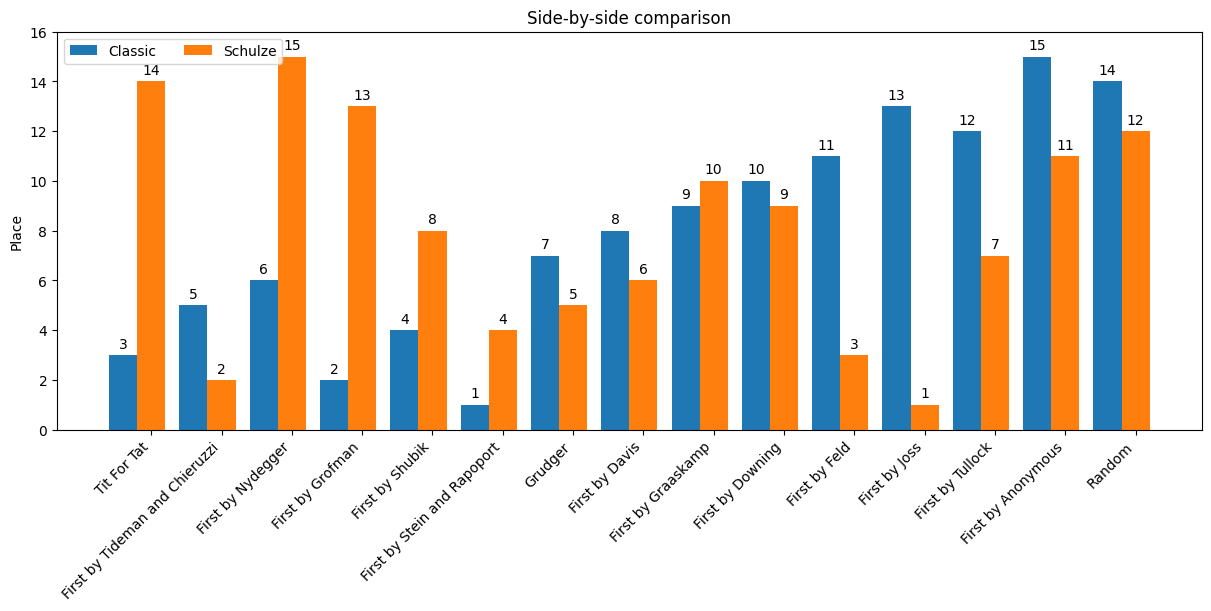

In [101]:
players_names = [p.name for p in players]
ranks = {
    'Classic': [classic_ranking.index(i)+1 for i in range(num_players)],
    'Schulze': [schulze_ranking.index(i)+1 for i in range(num_players)]
}

x = np.arange(len(players))
width = 0.4  
multiplier = 0
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

for type, place in ranks.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, place, width, label=type)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Place')
ax.set_title('Side-by-side comparison')
ax.set_xticks(x + width, players_names, rotation=45, ha="right")
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, num_players + 1)

plt.show()

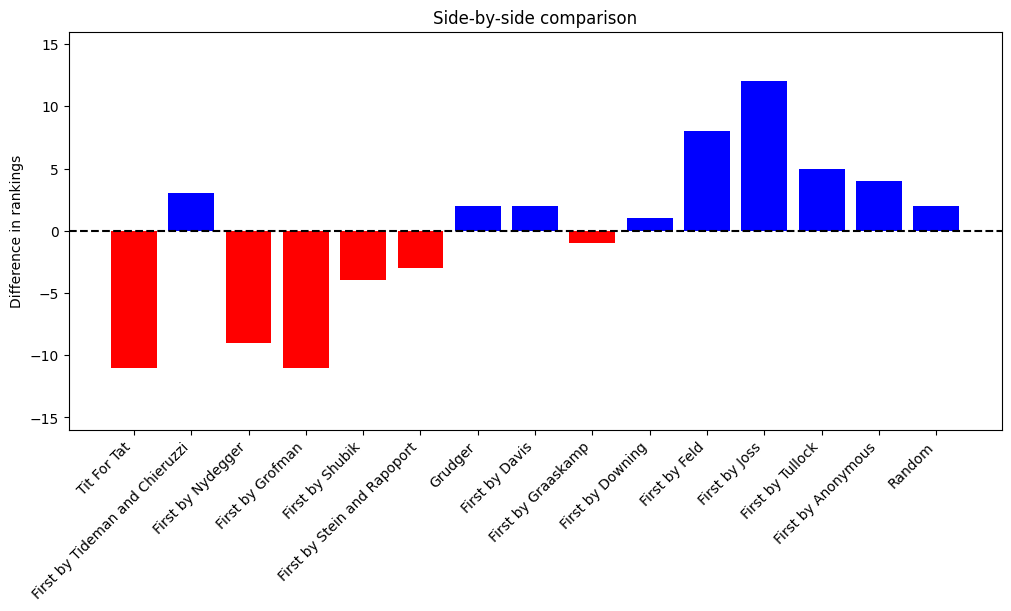

In [159]:
diffs = [classic_ranking.index(s) - schulze_ranking.index(s) for s in range(num_players)]

x = np.arange(len(players))
width = 1  
multiplier = 0
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.bar(players_names,diffs,color=['b' if d >=0 else 'r' for d in diffs ])
ax.axhline(y=0, color='black', linestyle='--')
ax.set_ylabel('Difference in rankings')
ax.set_title('Side-by-side comparison')
ax.set_xticks(x, players_names, rotation=45, ha="right")
ax.set_ylim(-num_players-1, num_players + 1)

plt.show()